# Week 7 - Assignment 7.1

In [ ]:
#Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. 
#Plot percentiles of birth weight versus mother’s age. 
#Compute Pearson’s and Spearman’s correlations. 
#How would you characterize the relationship between these variables?

In [21]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

In [210]:
import thinkstats2
import thinkplot
import numpy as np 
import pandas as pd
import math

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/CDBRFS08.ASC.gz") 
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/brfss.py")

In [86]:
df_nsfg = nsfg.ReadFemPreg() 
#df_nsfg = df_nsfg.dropna(subset=['agepreg', 'totalwgt_lb'])
# per the solution, dataset is filtered to live born
not_live = df_nsfg[df_nsfg.outcome != 1]
live = df_nsfg[df_nsfg.outcome == 1]
live_first_born = live[live.birthord ==1]
live_subs = live.dropna(subset=['agepreg', 'totalwgt_lb'])
len(df_nsfg), len(live), len(live_subs),  len(not_live), len(live_first_born)

(13593, 9148, 9038, 4445, 4413)

In [58]:
# SpearmanCorrelation
def SpearmanCorr(xdf, ydf):
    x_ranks = pd.Series(xdf).rank()
    y_ranks = pd.Series(ydf).rank()
    return Corr(x_ranks, y_ranks)

In [57]:
def Cov(xdf, ydf, mean_x=None, mean_y=None):
     #-- Commenting the below since np.asarray is already done in the calling function. 
    #xdf = np.asarray(xdf)
    #ydf = np.asarray(ydf)

    if mean_x is None:
        mean_x = np.mean(xdf)
    if mean_y is None:
        mean_y = np.mean(ydf)

    cov = np.dot(xdf-mean_x, ydf-mean_y) / len(xdf)
    return cov

In [59]:
def Corr(xdf, ydf):
    xs = np.asarray(xdf)
    ys = np.asarray(ydf)

    mean_x, var_x = thinkstats2.MeanVar(xdf)
    mean_y, var_y = thinkstats2.MeanVar(ydf)

    corr = Cov(xs, ys, mean_x, mean_y) / np.sqrt(var_x * var_y)
    return corr

In [82]:
mothers_age = live_subs.agepreg
birth_weight = live_subs.totalwgt_lb
print('Corr', Corr(mothers_age, birth_weight))
print('SpearmanCorr', SpearmanCorr(mothers_age, birth_weight))

Corr 0.06883397035410908
SpearmanCorr 0.09461004109658226


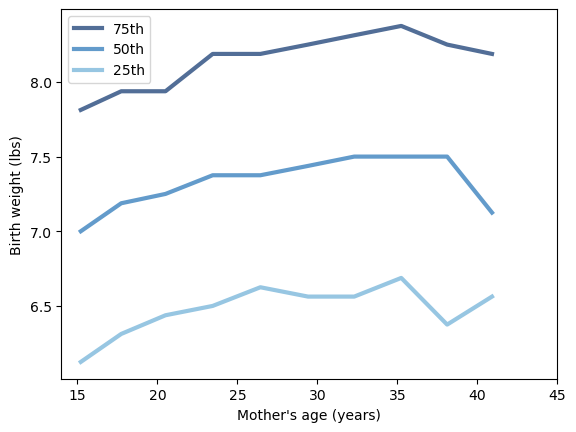

In [100]:
def BinnedPercentiles(df):
    """Bin the data by age and plot percentiles of weight for each bin.

    df: DataFrame
    """
    bins = np.arange(10, 48, 3) 
    indices = np.digitize(df.agepreg, bins)
    groups = df.groupby(indices)

    mothers_ages = [group.agepreg.mean() for i, group in groups][1:-1] 
    cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups][1:-1] 
    
    thinkplot.PrePlot(3)
    for percent in [75, 50, 25]:
        birth_weights = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(mothers_ages, birth_weights, label=label)

    thinkplot.Config(xlabel="Mother's age (years)",
                     ylabel='Birth weight (lbs)',
                     xlim=[14, 45], legend=True)
    
BinnedPercentiles(live_subs)

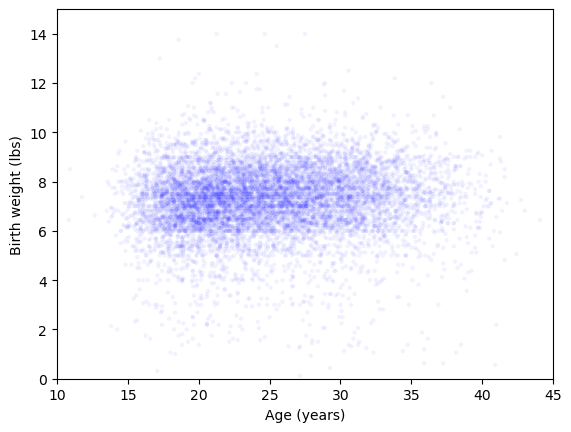

In [219]:
# Solution

thinkplot.Scatter(mothers_age, birth_weight, alpha=0.05, s=10)
thinkplot.Config(xlabel='Age (years)',
                     ylabel='Birth weight (lbs)',
                     xlim=[10, 45],
                     ylim=[0, 15],
                     legend=False)

The Pearson is around 0.07 and Spearman's is around 0.095. Pearson is lower than Spearman, 
the difference between them suggests some effects of outliers or a non-linear relationship.

Mother's Age vs Birth Weight plot is non-linear. 
Babies Birth weight shows a quick pace increase for young mothers between 15 and 26. 
We can see the plot gradually dips for mothers over 35 years age. This dip is not consistent. 
A perfect correlation as per Pearson is 1 or -1.
Had the correlation been over 0.5, it would have been a strong correlation.

Scatterplot shows a weak relationship between the variables as it is unclear and scattered.

# Week 7 - Assignment 8.1

In [ ]:
#In this chapter we used x¯ and median to estimate μ, and found that x¯yields lower MSE.
#Also, we used S^2 and Sn-1^2 to estimate σ, and found that S^2 is biased and Sn-1^2 is unbiased.

#Also check whether S2 or Sn-12 yields a lower MSE.

In [197]:
def MSE(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

In [198]:
def EstimateMSE(n=7, m=1000):
    """Evaluates RMSE of sample mean and median as estimators.

    n: sample size
    m: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('rmse xbar', MSE(means, mu))
    print('rmse median', MSE(medians, mu))

In [206]:
EstimateMSE(n=15, m=1000)
print('-------------------------')
EstimateMSE(n=15, m=1500)
print('-------------------------')
EstimateMSE(n=10, m=1000)
print('-------------------------')
EstimateMSE(n=10, m=1500)
print('-------------------------')
EstimateMSE(n=5, m=1000)
print('-------------------------')
EstimateMSE(n=5, m=1500)
print('-------------------------')

Experiment 1
rmse xbar 0.006248563944306441
rmse median 0.008458400325090919
-------------------------
Experiment 1
rmse xbar 0.0047810274432309235
rmse median -0.0004625011617971911
-------------------------
Experiment 1
rmse xbar 0.0007238211952469658
rmse median 0.002291835532500987
-------------------------
Experiment 1
rmse xbar -0.01141939372772157
rmse median -0.015035748710329757
-------------------------
Experiment 1
rmse xbar 0.006632931536930217
rmse median 0.0007875324002945128
-------------------------
Experiment 1
rmse xbar -0.005526647578646661
rmse median 0.0045892673319455485
-------------------------


In [213]:
def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

In [214]:
def EstimateRMSE(n=7, iters=100000):
    """RMSE for biased and unbiased estimators of population variance.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('Experiment 2')
    print('RMSE biased', RMSE(estimates1, sigma**2))
    print('RMSE unbiased', RMSE(estimates2, sigma**2))

In [218]:
EstimateRMSE(n=15, iters=1000)    
print('-------------------------')
EstimateRMSE(n=15, iters=1500)    
print('-------------------------')
EstimateRMSE(n=10, iters=1000)    
print('-------------------------')
EstimateRMSE(n=10, iters=1500)    
print('-------------------------')
EstimateRMSE(n=5, iters=1000)     
print('-------------------------')
EstimateRMSE(n=5, iters=1500)     
print('-------------------------')

EstimateRMSE(n=10, iters=1000)    
EstimateRMSE(n=10, iters=1500)   
EstimateRMSE(n=10, iters=2000)    

Experiment 2
RMSE biased 0.3474649583064034
RMSE unbiased 0.36543609377324854
-------------------------
Experiment 2
RMSE biased 0.3473808486462186
RMSE unbiased 0.36598273200844733
-------------------------
Experiment 2
RMSE biased 0.4520098899296252
RMSE unbiased 0.487878615093879
-------------------------
Experiment 2
RMSE biased 0.4294891262066729
RMSE unbiased 0.46564154598339325
-------------------------
Experiment 2
RMSE biased 0.6157945545201466
RMSE unbiased 0.7428291547640287
-------------------------
Experiment 2
RMSE biased 0.5964431150132299
RMSE unbiased 0.6948797286511459
-------------------------
Experiment 2
RMSE biased 0.4623498230903493
RMSE unbiased 0.5031354138991077
Experiment 2
RMSE biased 0.4317358560590925
RMSE unbiased 0.4692932980499777
Experiment 2
RMSE biased 0.4493357952353522
RMSE unbiased 0.48830806549601163


1) xbar and median yield lower mean error as m increases, so neither
one is obviously biased.

2) The biased estimator of variance yields lower RMSE than the unbiased
estimator. And the difference holds up as m increases.

# Week 7 - Assignment 8.2

In [ ]:
#Suppose that you draw a sample with size n=10 from an exponential distribution with
#λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the
#estimate L. Compute the standard error of the estimate and the 90% confidence interval.
#Repeat the experiment with a few different values of n and make a plot of standard error
#versus n.

In [190]:
def SimulateSample(lam=2, n=1000, iters=1000):
    """Sampling distribution of L as an estimator of exponential parameter.

    lam: parameter of an exponential distribution
    n: sample size
    iters: number of iterations
    """
    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        lamhat = 1.0 / np.mean(xs)
        estimates.append(lamhat)

    stderr = RMSE(estimates, lam)
    print('Standard Error', stderr)

    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('Confidence Interval', ci)
    VertLine(ci[0])
    VertLine(ci[1])

    # plot the CDF
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='Estimate',
                     ylabel='CDF',
                     title='Sampling Distribution')

    return stderr

Standard Error 0.7930313140624027
Confidence Interval (1.322626410885211, 3.6307690569999864)


0.7930313140624027

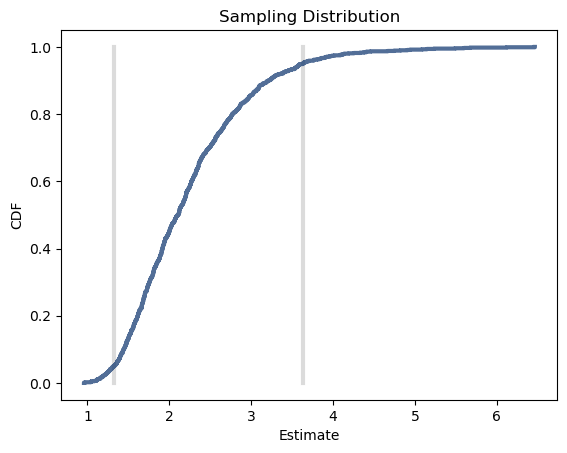

In [220]:
SimulateSample(n=10,lam=2, iters=1000)

Standard Error 0.20101648315814405
Confidence Interval (1.689853723183377, 2.3617003114738115)


0.20101648315814405

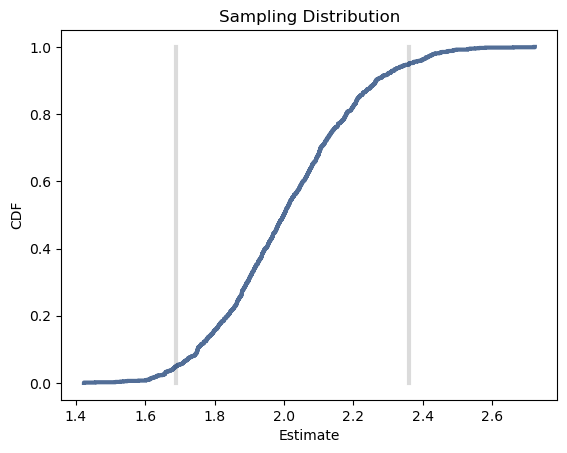

In [221]:
SimulateSample(n=100,lam=2, iters=1000)

Standard Error 0.06647870608780343
Confidence Interval (1.8993870573283615, 2.119912089553423)


0.06647870608780343

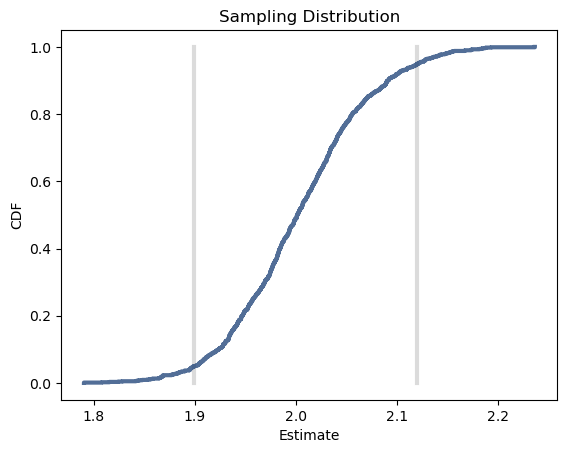

In [222]:
SimulateSample(n=1000,lam=2, iters=1000)

As the sample size increases, the standard error and CI decrease.

n=10:

Standard Error 0.7930313140624027

Confidence Interval (1.322626410885211, 3.6307690569999864)

n=100:
 
Standard Error 0.20101648315814405

Confidence Interval (1.689853723183377, 2.3617003114738115)

n=1000:
 
Standard Error 0.06647870608780343

Confidence Interval (1.8993870573283615, 2.119912089553423)